Name map


---


trial -> trying new variable

---


data_cleaning -> a separate file which ends with saving a pickle that you use in model.ipynb


---


model -> Main model with little extra code

---


model_testing -> Less code, optimized for testing

---


In [ ]:
import pandas as pd
import numpy as np
file_path= "/content/austinHousingData.csv"
data = pd.read_csv(file_path)

In [ ]:
data['zipcode'].nunique()

48

In [ ]:
################ NEW VARIABLE TEST##############################

In [ ]:
zp = pd.read_csv("/content/uszips.csv")
zp['zip']

,zip
0,601
1,602
2,603
3,606
4,610
...,...
33778,99923
33779,99925
33780,99926
33781,99927


In [ ]:
zp[zp['city']== 'Austin']['zip'].nunique()

51

In [ ]:
########### CHECKING IF MERGING IS RIGHT #########
missing_count = (data['zipcode'].isin(zp['zip']) == False).sum()
print(missing_count)

0


In [ ]:
import pandas as pd
zp = zp.set_index('zip')
zp.head()

,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
zip,,,,,,,,,,,,,,,,,
601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16721.0,100.2,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37510.0,477.6,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,48317.0,543.1,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5435.0,47.3,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25413.0,264.4,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [ ]:
data['population'] = data['zipcode'].map(zp['population'])
data['density'] = data['zipcode'].map(zp['density'])

In [ ]:
data[data['population'].isna()]['population'].sum()

np.float64(0.0)

In [ ]:
#USELESS FEATURES ## BUT WE DROP "city" and "zipcode" after using them. ## no dropping yet
useless_features= ['zipcode','zpid', 'city', 'streetAddress', 'zipcode', 'description','homeImage','homeType', 'latestPriceSource']

In [ ]:
data.dtypes

,0
zpid,int64
city,object
streetAddress,object
zipcode,int64
description,object
latitude,float64
longitude,float64
propertyTaxRate,float64
garageSpaces,int64
hasAssociation,bool


In [ ]:
data['latest_saledate']

,latest_saledate
0,2019-09-02
1,2020-10-13
2,2019-07-31
3,2018-08-08
4,2018-10-31
...,...
15166,2020-12-10
15167,2020-12-16
15168,2021-01-27
15169,2019-08-07


In [ ]:
data['latest_saledate'] = data['latest_saledate'].astype(str).str.strip()
data['latest_saledate'] = pd.to_datetime(data['latest_saledate'], errors='coerce')
print(data['latest_saledate'].isna().sum())

0


In [ ]:
data['latest_saledate'].head()

,latest_saledate
0,2019-09-02
1,2020-10-13
2,2019-07-31
3,2018-08-08
4,2018-10-31


In [ ]:
data = data.sort_values('latest_saledate').reset_index(drop=True)
data.isna().sum()

,0
zpid,0
city,0
streetAddress,0
zipcode,0
description,2
latitude,0
longitude,0
propertyTaxRate,0
garageSpaces,0
hasAssociation,0


In [ ]:
 # We have 958 days of analysis
 data['latest_saledate'].value_counts().sort_index().isna().sum()

np.int64(0)

In [ ]:
#################### 1 CITY ONLY ###############################
df= data[data['city'] == 'austin'].sort_values(by='latest_saledate')
df.select_dtypes(include='integer').columns

Index(['zpid', 'zipcode', 'garageSpaces', 'parkingSpaces', 'yearBuilt',
       'numPriceChanges', 'latest_salemonth', 'latest_saleyear', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'numOfPrimarySchools',
       'numOfElementarySchools', 'numOfMiddleSchools', 'numOfHighSchools',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBedrooms',
       'numOfStories'],
      dtype='object')

In [ ]:
data['latest_saledate'].dropna()

,latest_saledate
0,2018-01-22
1,2018-01-22
2,2018-01-22
3,2018-01-22
4,2018-01-23
...,...
15166,2021-01-27
15167,2021-01-28
15168,2021-01-29
15169,2021-01-29


In [ ]:
df.select_dtypes(include='object').columns

Index(['city', 'streetAddress', 'description', 'homeType', 'latestPriceSource',
       'homeImage'],
      dtype='object')

In [ ]:
################# FINAL DATAFRAME IN USE ################
df_1 = df.drop(columns=useless_features, errors='ignore')
df_1.shape

(15020, 41)

In [ ]:
# FINAL CHECK BEFORE MERGING
df_1.isna().sum()

,0
latitude,0
longitude,0
propertyTaxRate,0
garageSpaces,0
hasAssociation,0
hasCooling,0
hasGarage,0
hasHeating,0
hasSpa,0
hasView,0


In [ ]:
# Get Mortgage rate
import pandas as pd
MTG = pd.read_csv('/content/MORTGAGE30US.csv')

print(MTG.shape)

MPPSQ = pd.read_csv('/content/MEDLISPRIPERSQUFEE12420.csv')
print(MPPSQ.dtypes)

(160, 2)
observation_date           object
MEDLISPRIPERSQUFEE12420     int64
dtype: object


In [ ]:
############################################################################### Tranforming Mortgage Data #############################################################################################

In [ ]:
################## TREATING DATES ON EXTERNAL MACRO VARIABLES ##################
def parse_obs_date(date_str):
    d = str(date_str).strip().split()[0]
    if "/" in d:
        return pd.to_datetime(d, format='%d/%m/%Y', errors='raise')
    else:
        return pd.to_datetime(d, errors='raise')

MTG['observation_date'] = MTG['observation_date'].apply(parse_obs_date)
MPPSQ['observation_date'] = MPPSQ['observation_date'].apply(parse_obs_date)
MTG['MORTGAGE30US'].dtypes

dtype('float64')

In [ ]:
print(MTG.isna().sum())
print(MPPSQ.isna().sum())

observation_date    0
MORTGAGE30US        0
dtype: int64
observation_date           0
MEDLISPRIPERSQUFEE12420    0
dtype: int64


In [ ]:
df_2 = df_1.copy()

In [ ]:
##################################.MERGE. ####################################

import pandas as pd

df_2['latest_saledate'] = pd.to_datetime(df_2['latest_saledate'], errors='coerce')
df_2 = df_2.sort_values('latest_saledate')

# Read and prepare the MTG rates
MTG['observation_date'] = pd.to_datetime(MTG['observation_date'], format='%d/%m/%Y', errors='coerce')
MTG = MTG.sort_values('observation_date')

# Merge using asof so that each sale date gets the most recent MTG rate available
df_2 = pd.merge_asof(df_2, MTG, left_on='latest_saledate', right_on='observation_date', direction='backward')

# Optional: Remove the duplicate 'date' column if no longer need it
df_2.drop(columns=['observation_date'], inplace=True)
df_2.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfAccessibilityFeatures',
       'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'population',
       'density', 'MORTGAGE30US'],
      dtype='object')

In [ ]:
# read variable, sort variable on date
MPPSQ['observation_date'] = pd.to_datetime(MPPSQ['observation_date'], format='%d/%m/%Y', errors='coerce')
MPPSQ = MPPSQ.sort_values('observation_date')

# Merge using asof so that each sale date gets the most recent MPPSQ available
df_2 = pd.merge_asof(df_2, MPPSQ, left_on='latest_saledate', right_on='observation_date', direction='backward')

# Optional: Remove the duplicate 'date' column if you no longer need it
df_2.drop(columns=['observation_date'], inplace=True)
df_2.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfAccessibilityFeatures',
       'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'population',
       'density', 'MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420'],
      dtype='object')

In [ ]:
df_2[['latest_saledate','MORTGAGE30US','MEDLISPRIPERSQUFEE12420']]

,latest_saledate,MORTGAGE30US,MEDLISPRIPERSQUFEE12420
0,2018-01-22,4.04,163
1,2018-01-22,4.04,163
2,2018-01-22,4.04,163
3,2018-01-22,4.04,163
4,2018-01-23,4.04,163
...,...,...,...
15015,2021-01-27,2.77,226
15016,2021-01-28,2.73,226
15017,2021-01-29,2.73,226
15018,2021-01-29,2.73,226


In [ ]:
df_2.isna().sum()

,0
latitude,0
longitude,0
propertyTaxRate,0
garageSpaces,0
hasAssociation,0
hasCooling,0
hasGarage,0
hasHeating,0
hasSpa,0
hasView,0


In [ ]:
df_2.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'numOfPhotos', 'numOfAccessibilityFeatures',
       'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'population',
       'density', 'MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# change path as desired, use the same path in the model file
df_2.to_pickle("/content/drive/MyDrive/lions_den_data/df_2_trial.pkl")

In [ ]:
df_2 = pd.read_pickle("/content/drive/MyDrive/df_2_trial2.pkl")

In [ ]:
# FIRST SPLIT
n_train = int(0.6 * len(df_2))
train = df_2.iloc[:n_train]
test  = df_2.iloc[n_train:]

X_train = train.drop(columns=['latestPrice_log'])
y_train = train['latestPrice_log']
X_test = test.drop(columns=['latestPrice_log'])
y_test = test['latestPrice_log']
X_train.shape


(7803, 44)

In [ ]:
## run -> on next script -> df_2 = pd.read_pickle('/content/drive/MyDrive/lions_den_data/df_2.pkl')


In [ ]:
############################### Feature selection #######################################

In [ ]:
############# Univariate Feature Selection
binary_columns = ['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']
# Subset only the binary features
X_train_binary = X_train[binary_columns]
X_test_binary = X_test[binary_columns]

from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Set the number of features you want to select (if you want to select a subset)
# For demonstration, we'll evaluate all binary features
selector_binary = SelectKBest(score_func=f_regression, k='all')

# Fit the selector on the binary features of the training set
selector_binary.fit(X_train_binary, y_train)

# Retrieve the scores for each binary feature
binary_feature_scores = pd.Series(selector_binary.scores_, index=binary_columns)
print("Binary Feature Scores:")
print(binary_feature_scores)

# If you want to select only the top N binary features (e.g., top 3):
top_n = 3
selected_binary_features = binary_feature_scores.nlargest(top_n).index
print("Selected Binary Features:", selected_binary_features)

# Reduce your datasets to these selected features:
X_train_binary_selected = X_train_binary[selected_binary_features]
X_test_binary_selected = X_test_binary[selected_binary_features]

Binary Feature Scores:
hasAssociation      5.063620
hasCooling         17.902976
hasGarage          38.091015
hasHeating          9.963372
hasSpa            370.734842
hasView           159.952185
dtype: float64
Selected Binary Features: Index(['hasSpa', 'hasView', 'hasGarage'], dtype='object')


In [ ]:
################## Mutual information ###############
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector_binary_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_binary_mi.fit(X_train_binary, y_train)

binary_feature_scores_mi = pd.Series(selector_binary_mi.scores_, index=binary_columns)
print("Binary Feature Mutual Information Scores:")
print(binary_feature_scores_mi)

# For example, select top 3 binary features by mutual information:
selected_binary_features_mi = binary_feature_scores_mi.nlargest(top_n).index
print("Selected Binary Features (Mutual Info):", selected_binary_features_mi)

# Subset data:
X_train_binary_selected_mi = X_train_binary[selected_binary_features_mi]
X_test_binary_selected_mi = X_test_binary[selected_binary_features_mi]



Binary Feature Mutual Information Scores:
hasAssociation    0.007131
hasCooling        0.001648
hasGarage         0.012699
hasHeating        0.004256
hasSpa            0.026502
hasView           0.013849
dtype: float64
Selected Binary Features (Mutual Info): Index(['hasSpa', 'hasView', 'hasGarage'], dtype='object')


In [ ]:
print(df_2.dtypes)


latitude                             float64
longitude                            float64
propertyTaxRate                      float64
garageSpaces                           int64
hasAssociation                          bool
hasView                                 bool
parkingSpaces                          int64
yearBuilt                              int64
numPriceChanges                        int64
latest_saledate               datetime64[ns]
latest_salemonth                       int64
latest_saleyear                        int64
numOfPhotos                            int64
numOfAppliances                        int64
numOfParkingFeatures                   int64
numOfPatioAndPorchFeatures             int64
numOfSecurityFeatures                  int64
lotSizeSqFt                          float64
livingAreaSqFt                         int64
numOfHighSchools                       int64
avgSchoolDistance                    float64
avgSchoolRating                      float64
avgSchoolS

In [ ]:
X_train

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasView,parkingSpaces,yearBuilt,numPriceChanges,latest_saledate,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,population,density,MORTGAGE30US,MEDLISPRIPERSQUFEE12420
0,30.443314,-97.802513,1.98,0,True,False,0,1997,11,2018-01-22,...,8.666667,1632,16,3.0,4,1,29322.0,959.6,4.04,163
1,30.197430,-97.741470,1.98,0,False,False,0,1976,3,2018-01-22,...,3.000000,794,12,2.0,3,1,51069.0,872.3,4.04,163
2,30.157705,-97.782372,1.98,2,True,False,2,2005,2,2018-01-22,...,5.333333,1057,14,3.0,3,2,51069.0,872.3,4.04,163
3,30.398659,-97.696739,1.98,2,False,False,2,1984,3,2018-01-23,...,4.000000,1073,13,3.0,4,2,50592.0,2149.7,4.04,163
4,30.191980,-97.734581,1.98,1,False,False,1,1986,1,2018-01-23,...,3.666667,1287,14,2.0,3,1,51069.0,872.3,4.04,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,30.433296,-97.742775,1.98,2,False,False,2,1985,1,2020-07-08,...,5.778694,1237,15,2.0,4,1,30894.0,1535.4,3.07,186
10400,30.243877,-97.738037,1.98,2,False,False,2,2020,2,2020-07-08,...,4.333333,916,14,6.0,4,2,50479.0,2223.8,3.07,186
10401,30.313204,-97.749832,1.98,1,False,False,1,1950,2,2020-07-08,...,6.000000,1196,16,2.0,3,1,27136.0,1198.0,3.07,186
10402,30.342079,-97.766251,1.98,2,False,False,2,2013,1,2020-07-08,...,7.000000,1177,16,4.0,3,2,27136.0,1198.0,3.07,186


In [ ]:
y_train

,latestPrice_log
0,13.429701
1,12.254387
2,12.468437
3,12.398757
4,12.301383
...,...
10399,12.846610
10400,14.457364
10401,13.709038
10402,13.652992


In [ ]:
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13005 entries, 0 to 13004
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   latitude                    13005 non-null  float64       
 1   longitude                   13005 non-null  float64       
 2   propertyTaxRate             13005 non-null  float64       
 3   garageSpaces                13005 non-null  int64         
 4   hasAssociation              13005 non-null  bool          
 5   hasView                     13005 non-null  bool          
 6   parkingSpaces               13005 non-null  int64         
 7   yearBuilt                   13005 non-null  int64         
 8   numPriceChanges             13005 non-null  int64         
 9   latest_saledate             13005 non-null  datetime64[ns]
 10  latest_salemonth            13005 non-null  int64         
 11  latest_saleyear             13005 non-null  int64     

In [ ]:
pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from deap import base, creator, tools, algorithms
import random

# Load Data
X = df_2.drop(columns=['latestPrice_log', 'latest_saledate']) # Drop 'latest_saledate' here
y = df_2['latestPrice_log']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Genetic Algorithm Setup
num_features = X_train.shape[1]
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize fitness
creator.create("Individual", list, fitness=creator.FitnessMax)

# Initialize population
def init_individual():
    return creator.Individual([random.randint(0, 1) for _ in range(num_features)])

def evaluate(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return -np.inf,  # Avoid empty feature sets

    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    fitness = r2 - 0.1 * rmse  # Adjust weight on RMSE penalty

    return fitness,

# Genetic Operators
toolbox = base.Toolbox()
toolbox.register("individual", init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run Genetic Algorithm
population = toolbox.population(n=20)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, verbose=True)

# Get Best Feature Set
best_individual = tools.selBest(population, k=1)[0]
selected_features = [X.columns[i] for i, bit in enumerate(best_individual) if bit == 1]
print("Selected Features:", selected_features)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	20    
1  	12    
2  	14    
3  	11    
4  	13    
5  	8     
6  	11    
7  	9     
8  	13    
9  	16    
10 	17    
11 	10    
12 	9     
13 	16    
14 	8     
15 	13    
16 	10    
17 	12    


KeyboardInterrupt: 

In [ ]:
from deap import base, creator, tools, algorithms
import random

# Create Fitness and Individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the number of generations before checking for convergence
MAX_GENERATIONS = 50
CONVERGENCE_LIMIT = 5  # Number of generations to check for no improvement

# Define the individual and population initialization functions
def create_individual():
    return [random.randint(0, 1) for _ in range(len(df_2.columns) - 1)]  # Excluding target

# Create the population
population = [creator.Individual(create_individual()) for _ in range(20)]

# Define the fitness function
def evaluate(individual):
    selected_features = [df_2.columns[i] for i, x in enumerate(individual) if x == 1]
    if not selected_features:
        return 0,  # Fitness of 0 if no features are selected
    X_selected = df_2[selected_features]
    X_train, X_val, y_train, y_val = train_test_split(X_selected, df_2['latestPrice_log'], test_size=0.2)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    r2_score = model.score(X_val, y_val)
    return r2_score,

# Create the toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Initialize the algorithm
def run_ga_until_convergence(population, toolbox, max_generations, convergence_limit):
    best_fitness = None
    stagnation_counter = 0

    for gen in range(max_generations):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with invalid fitness values
        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_individuals)
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit

        # Check if there's no improvement in fitness
        current_best_fitness = max(ind.fitness.values[0] for ind in offspring)
        if best_fitness is None or current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            stagnation_counter = 0
        else:
            stagnation_counter += 1

        if stagnation_counter >= convergence_limit:
            print(f"Convergence reached at generation {gen}. Stopping early.")
            break

        # Replace the population with the offspring
        population[:] = offspring

        # Print progress
        print(f"Generation {gen}: Best Fitness = {best_fitness}")

# Run the genetic algorithm with convergence check
run_ga_until_convergence(population, toolbox, max_generations=MAX_GENERATIONS, convergence_limit=CONVERGENCE_LIMIT)


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [ ]:
############# Random Forest Feature Importance ######################
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Split the data
n_train = int(0.6 * len(df_2))
train = df_2.iloc[:n_train]
test  = df_2.iloc[n_train:]

X_train = train.drop(columns=['latestPrice_log'])
y_train = train['latestPrice_log']
X_test = test.drop(columns=['latestPrice_log'])
y_test = test['latestPrice_log']

# Fit Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Calculate the number of features corresponding to the top 70%
num_features = int(0.7 * len(importances))

# Get the indices for the top features
top_idx = importances.argsort()[-num_features:]

# Map indices to feature names
top_features = X_train.columns[top_idx]
print("Top 70% features (Random Forest):", top_features)

# Optionally, reduce your datasets to these selected features:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [ ]:
############# Random Forest Feature Importance ######################
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Split the data
n_train = int(0.6 * len(df_2))
train = df_2.iloc[:n_train]
test  = df_2.iloc[n_train:]

X_train = train.drop(columns=['latestPrice_log', 'latest_saledate']) # Drop 'latest_saledate'
y_train = train['latestPrice_log']
X_test = test.drop(columns=['latestPrice_log', 'latest_saledate'])  # Drop 'latest_saledate'
y_test = test['latestPrice_log']

# Fit Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Calculate the number of features corresponding to the top 70%
num_features = int(0.7 * len(importances))

# Get the indices for the top features
top_idx = importances.argsort()[-num_features:]

# Map indices to feature names
top_features = X_train.columns[top_idx]
print("Top 70% features (Random Forest):", top_features)

# Optionally, reduce your datasets to these selected features:
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

Top 70% features (Random Forest): Index(['numOfParkingFeatures', 'numOfHighSchools', 'MedianStudentsPerTeacher',
       'latest_salemonth', 'numOfAppliances', 'numOfBedrooms', 'numOfPhotos',
       'MORTGAGE30US', 'hasAssociation', 'avgSchoolDistance', 'yearBuilt',
       'population', 'numPriceChanges', 'numOfBathrooms', 'avgSchoolSize',
       'lotSizeSqFt', 'density', 'latitude', 'longitude', 'avgSchoolRating',
       'livingAreaSqFt'],
      dtype='object')


In [ ]:
importances

array([6.00525412e-02, 6.31243536e-02, 1.57129854e-03, 2.40682036e-03,
       1.74936981e-02, 9.47268222e-04, 9.07543015e-04, 5.20440924e-04,
       8.20739834e-04, 1.39202123e-03, 1.97077636e-03, 2.84599661e-02,
       3.00761390e-02, 7.71284473e-03, 1.44009804e-03, 1.20515963e-02,
       5.97761535e-07, 8.80028855e-03, 5.02489802e-03, 1.26312545e-03,
       1.30223405e-03, 0.00000000e+00, 7.14878480e-04, 1.47245775e-04,
       4.38553463e-02, 4.01827491e-01, 6.07394133e-04, 6.41158422e-04,
       1.42576833e-04, 5.20552410e-03, 1.75372228e-02, 8.74803481e-02,
       4.27768121e-02, 6.99004581e-03, 4.22273901e-02, 9.66765817e-03,
       2.38356598e-03, 6.43350019e-04, 6.72509690e-04, 2.81122774e-02,
       4.54908213e-02, 1.15638095e-02, 3.97328449e-03])

In [ ]:
# Get the original features
original_features = X_train.columns

# Find features that were removed
removed_features = [feature for feature in original_features if feature not in top_features]
print("Removed features:", removed_features)


Removed features: ['propertyTaxRate', 'garageSpaces', 'hasView', 'parkingSpaces', 'latest_saleyear', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfStories', 'MEDLISPRIPERSQUFEE12420']


In [ ]:
# Define the list of features to remove
removed_features = [
    'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
    'numOfAccessibilityFeatures', 'numOfWaterfrontFeatures',
    'numOfWindowFeatures', 'numOfCommunityFeatures',
    'numOfPrimarySchools', 'numOfElementarySchools',
    'numOfMiddleSchools', 'Housing_Tenure_Ownership',
    'Housing_Tenure_Rental'
]

# Drop these features from the dataframe
df_2 = df_2.drop(columns=removed_features)

# Verify the remaining columns
print("Remaining columns:", df_2.columns)


KeyError: "['hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'numOfAccessibilityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures', 'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools', 'Housing_Tenure_Ownership', 'Housing_Tenure_Rental'] not found in axis"

In [ ]:
df_2

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasView,parkingSpaces,yearBuilt,numPriceChanges,latest_saledate,...,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,population,density,MORTGAGE30US,MEDLISPRIPERSQUFEE12420,latestPrice_log
0,30.443314,-97.802513,1.98,0,True,False,0,1997,11,2018-01-22,...,1632,16,3.0,4,1,29322.0,959.6,4.04,163,13.429701
1,30.197430,-97.741470,1.98,0,False,False,0,1976,3,2018-01-22,...,794,12,2.0,3,1,51069.0,872.3,4.04,163,12.254387
2,30.157705,-97.782372,1.98,2,True,False,2,2005,2,2018-01-22,...,1057,14,3.0,3,2,51069.0,872.3,4.04,163,12.468437
3,30.398659,-97.696739,1.98,2,False,False,2,1984,3,2018-01-23,...,1073,13,3.0,4,2,50592.0,2149.7,4.04,163,12.398757
4,30.191980,-97.734581,1.98,1,False,False,1,1986,1,2018-01-23,...,1287,14,2.0,3,1,51069.0,872.3,4.04,163,12.301383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13000,30.297621,-97.712097,1.98,3,False,True,3,1947,6,2021-01-27,...,1156,15,1.0,2,1,6576.0,1873.3,2.77,226,12.959844
13001,30.367903,-97.653358,1.98,4,True,False,4,2012,1,2021-01-28,...,1066,12,3.0,4,2,31410.0,801.1,2.73,226,12.675764
13002,30.424355,-97.726814,1.98,2,False,False,2,1982,1,2021-01-29,...,1486,15,2.0,3,1,30894.0,1535.4,2.73,226,13.017003
13003,30.357496,-97.642845,1.98,0,True,False,0,2006,3,2021-01-29,...,1066,12,2.0,4,1,31410.0,801.1,2.73,226,12.310428


In [ ]:
# FIRST SPLIT
n_train = int(0.8 * len(df_2))
train = df_2.iloc[:n_train]
test  = df_2.iloc[n_train:]

X_train = train.drop(columns=['latestPrice_log'])
y_train = train['latestPrice_log']
X_test = test.drop(columns=['latestPrice_log'])
y_test = test['latestPrice_log']
X_train.shape

(10404, 31)

In [ ]:
pip install mgwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 19.7 MB/s eta 0:00:00


In [ ]:
# GWR using mgwr library: MAIN : output -> local_betas
import pandas as pd
import numpy as np
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

coords = X_train[['latitude', 'longitude']].values
# dropping : garageSpaces and parkingSpaces are perfectly collinear (their correlation is 1 and their VIFs are infinite)
X_ = X_train.select_dtypes(include=['number']).drop(columns=['latitude', 'longitude', 'latest_saledate', 'parkingSpaces', 'MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420'],
    errors='ignore'
).values

y_ = y_train.values.reshape(-1, 1)
X_gwr = np.hstack([np.ones((X_.shape[0], 1)), X_])

# using a fixed band width
fixed_bw = 0.3

gwr_model = GWR(
    coords,       # (n, 2)
    y_,           # (n, 1)
    X_gwr,        # (n, p) [including intercept]
    bw=fixed_bw,
    kernel='gaussian',  # Gaussian kernel
    fixed=True,         # fixed distance bandwidth
    spherical=False
).fit()

local_betas = gwr_model.params  # shape (n, p)
print("Local betas shape:\n", local_betas.shape)

Local betas shape:
 (10404, 24)


In [ ]:
############################################### Random Forest with Local Slopes #################################################
# MODEL 0 "USING local_betas" "no parameter tuning"

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Why did we remove from X_train?
# latitude & longitude -> used by GWR
# latest_saledate -> used for sorting, we have already dynamically incorporated time dependence using other variables
# parkingSpaces -> Perfect collinearity with Garage spaces

X_rf = X_train.select_dtypes(include=['number']).drop(
    columns=['latitude', 'longitude', 'latest_saledate', 'parkingSpaces'],
    errors='ignore'
).values
print("X_rf shape:", X_rf.shape)

# local_betas are obtained from the GWR model; its shape is (n, p).
local_betas = gwr_model.params
print("local_betas shape:", local_betas.shape)

# local_slopes are defined by dropping the intercept column (first column) from local_betas.
# This gives us an array of shape (n, p-1).
local_slopes = local_betas[:, 1:]

X_aug = np.hstack([X_rf, local_slopes])
print("Augmented feature shape:", X_aug.shape)

y_array = y_.ravel()


n_total = X_aug.shape[0]
n_train = int(0.8 * n_total)

X_train_aug = X_aug[:n_train]
y_train_rf = y_array[:n_train]
X_valid_aug = X_aug[n_train:]
y_valid_rf = y_array[n_train:]

rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth =12,
    min_samples_split=6,
    min_samples_leaf=4,
    max_samples = 0.8,
    max_features=0.3,
    random_state=11,
    n_jobs=-1
)

rf.fit(X_train_aug, y_train_rf)
y_pred = rf.predict(X_valid_aug)

# Evaluation
r2 = r2_score(y_valid_rf, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid_rf, y_pred))

print("Random Forest Performance:")
print(f"  R^2:  {r2:.3f}")
print(f"  RMSE: {rmse:,.3f}")

X_rf shape: (10404, 25)
local_betas shape: (10404, 24)
Augmented feature shape: (10404, 48)
Random Forest Performance:
  R^2:  0.739
  RMSE: 0.273


In [ ]:
train_dates = train['latest_saledate'].values
# Chronological split on the RF data (which comes from the training set)
n_rf_total = X_aug.shape[0]    # Should match len(train_dates)
n_rf_train = int(0.8 * n_rf_total)

X_train_aug = X_aug[:n_rf_train]
y_train_rf = y_array[:n_rf_train]
X_valid_aug = X_aug[n_rf_train:]
y_valid_rf = y_array[n_rf_train:]

rf_test_dates = train_dates[n_rf_train:]

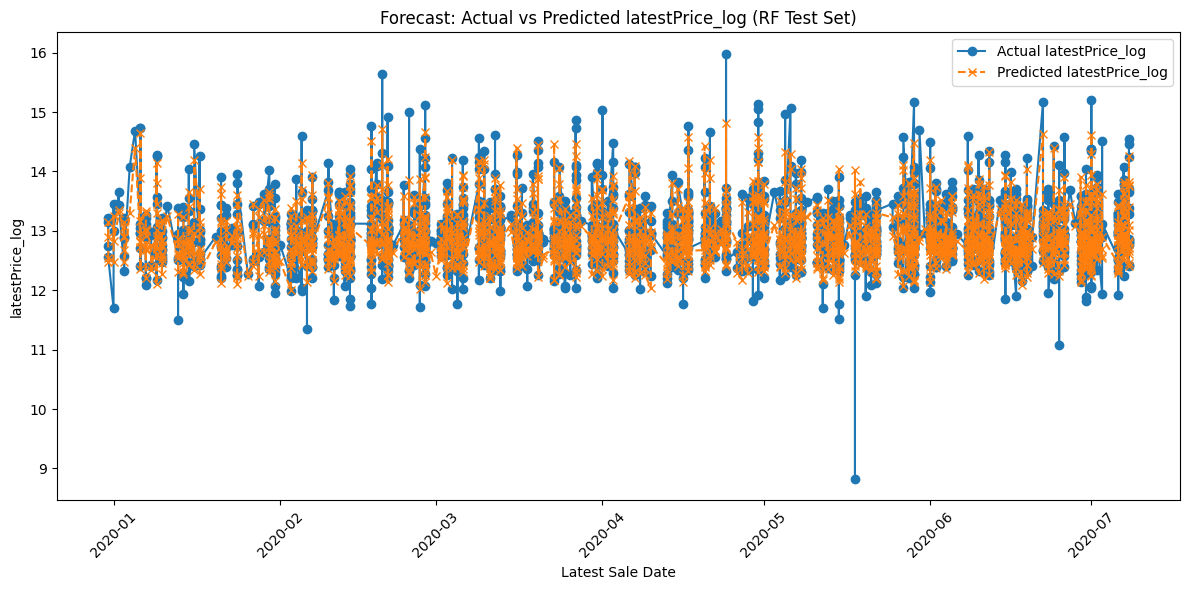

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rf_test_dates, y_valid_rf, label='Actual latestPrice_log', marker='o', linestyle='-')
plt.plot(rf_test_dates, y_pred, label='Predicted latestPrice_log', marker='x', linestyle='--')
plt.xlabel('Latest Sale Date')
plt.ylabel('latestPrice_log')
plt.title('Forecast: Actual vs Predicted latestPrice_log (RF Test Set)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
########################################## MODEL PERFORMANCE EVALUATION ########################################

# Predict on the training and validation sets using the correct variables.
y_train_pred = rf.predict(X_train_aug)
y_valid_pred = rf.predict(X_valid_aug)

# Compute R² scores.
train_r2 = r2_score(y_train_rf, y_train_pred)
valid_r2 = r2_score(y_valid_rf, y_valid_pred)

# Compute RMSE scores.
train_rmse = np.sqrt(mean_squared_error(y_train_rf, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid_rf, y_valid_pred))

# Print training metrics.
print("Training Metrics:")
print(f"  R²:   {train_r2:.3f}")
print(f"  RMSE: {train_rmse:,.3f}")

# Print validation metrics.
print("\nValidation Metrics:")
print(f"  R²:   {valid_r2:.3f}")
print(f"  RMSE: {valid_rmse:,.3f}")

Training Metrics:
  R²:   0.862
  RMSE: 0.205

Validation Metrics:
  R²:   0.739
  RMSE: 0.273
